Базовый алгоритм Pytorch, но с созданным набором изображений

In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.onnx
import torchvision
%matplotlib inline
plt.ion()   # interactive moden

C:\Users\MIXA\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#get address such as C:\\(folder with you notebook)
dir = os.path.abspath(os.curdir)
# i suppose what your image folders placed in datasets directory 
data_dir=os.path.join(dir, "dsts\\")

In [3]:
# Data scaled and normalization for training and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.RandomResizedCrop(32),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

In [4]:

#Create function to get your(my) images dataset and resize it to size for model
def get_dataset(data_dir, data_transforms ):
    # create train and test datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                              data_transforms[x])
                      for x in ['train', 'test']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'test']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
    #get classes from train dataset folders name
    classes = image_datasets['train'].classes

    return dataloaders["train"], dataloaders['test'], classes, dataset_sizes

In [5]:

trainloader, testloader, classes, dataset_sizes=get_dataset(data_dir,data_transforms)
print('Classes: ',  classes)
print('The datasest have: ',  dataset_sizes ," images")

Classes:  ['airplane', 'bike', 'gitar', 'notebook', 'weapon']
The datasest have:  {'train': 398, 'test': 100}  images


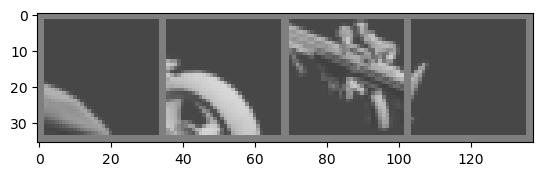

airplane  bike weapon gitar


In [6]:

# create function for print unnormalized images
def imshow(img):
    img = img / 2+0.5      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
#images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.003)

In [8]:
device = torch.device("cuda")
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 15 == 14:    # print every 15 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 15))
            running_loss = 0.0
print('Finished Training')

[1,    15] loss: 2.235
[1,    30] loss: 1.761
[1,    45] loss: 1.713
[1,    60] loss: 1.662
[1,    75] loss: 1.613
[1,    90] loss: 1.579
[2,    15] loss: 1.493
[2,    30] loss: 1.379
[2,    45] loss: 1.508
[2,    60] loss: 1.344
[2,    75] loss: 1.312
[2,    90] loss: 1.394
[3,    15] loss: 1.262
[3,    30] loss: 1.312
[3,    45] loss: 1.187
[3,    60] loss: 1.321
[3,    75] loss: 1.110
[3,    90] loss: 1.182
[4,    15] loss: 1.168
[4,    30] loss: 1.081
[4,    45] loss: 1.112
[4,    60] loss: 1.080
[4,    75] loss: 1.148
[4,    90] loss: 1.027
[5,    15] loss: 0.952
[5,    30] loss: 1.126
[5,    45] loss: 1.079
[5,    60] loss: 1.046
[5,    75] loss: 0.765
[5,    90] loss: 1.068
[6,    15] loss: 0.969
[6,    30] loss: 1.061
[6,    45] loss: 0.961
[6,    60] loss: 0.975
[6,    75] loss: 0.885
[6,    90] loss: 1.031
[7,    15] loss: 0.816
[7,    30] loss: 0.819
[7,    45] loss: 0.876
[7,    60] loss: 0.805
[7,    75] loss: 0.994
[7,    90] loss: 0.976
[8,    15] loss: 0.936
[8,    30] 

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 2.6814,  2.8869, -3.6840, -2.6804,  3.9975, -6.4544, -5.9205, -5.9459,
        -6.1318, -6.1998])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 2.8232,  4.7273, -3.0063,  1.7485,  1.7850, -9.4276, -9.0193, -8.9244,
        -9.0123, -9.1314])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 2.7700,  0.6384,  1.0885,  1.4962,  0.2008, -6.1136, -5.8384, -6.0490,
        -6.2354, -6.1283])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  2.8161,   2.1375,  -0.5497,   5.8584,   0.0532, -10.4384,  -9.7628,
         -9.9309, -10.1663, -10.0433])


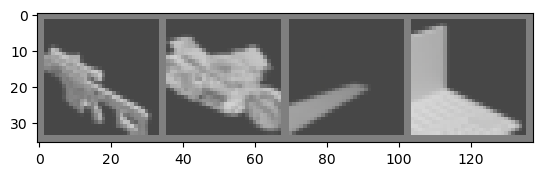

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 2.9067,  3.4646, -4.5764, -3.1277,  5.9987, -8.6948, -8.6051, -8.4366,
        -8.5831, -8.7606])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([  3.5635,   6.1737,  -5.0567,  -1.2182,   4.5911, -11.2408, -10.7836,
        -10.5401, -10.8126, -10.9846])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 4.8755,  2.5149, -4.3374, -2.7956,  4.9227, -9.2564, -8.5518, -8.6658,
        -9.0971, -9.1551])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.8761,  2.1626, -3.4816,  0.8423,  1.6323, -9.3988, -8.5841, -8.8093,
        -9.4466, -9.4153])


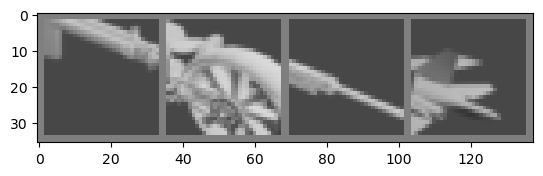

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([  3.7826,   4.1530,  -5.3033,  -4.1608,   7.1332, -10.2641,  -9.9853,
         -9.7167, -10.0547, -10.1900])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.7269,  2.1407, -3.1410, -0.4486,  2.2379, -6.9468, -6.3656, -6.4836,
        -6.8080, -6.8523])
Predict class - airplane, real class - weapon, probability (airplane,bike) - tensor([ 4.5977,  3.3854, -5.0463, -3.2410,  4.5917, -8.5331, -7.8093, -7.8585,
        -8.2569, -8.2674])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 2.4750,  0.9276,  1.1454,  3.0093, -0.1250, -7.0575, -6.6515, -6.8284,
        -7.0199, -6.7924])


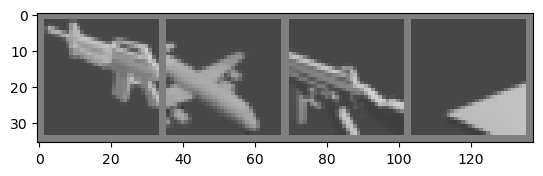

Predict class - weapon, real class - airplane, probability (airplane,bike) - tensor([ 3.9359,  2.0014, -2.6301, -1.7741,  4.0465, -8.4876, -7.9448, -8.0646,
        -8.5167, -8.4729])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 3.8461,  3.3750, -4.8588, -3.4924,  5.4203, -8.7650, -8.0153, -8.0637,
        -8.3965, -8.4838])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0317,  0.6142,  2.3157, -0.0077,  1.3815, -4.5839, -4.7569, -4.8098,
        -4.6187, -4.6271])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  3.6851,   1.4856,   0.7895,   7.3334,  -2.3223, -10.6817,  -9.7339,
        -10.1075, -10.2099, -10.0598])


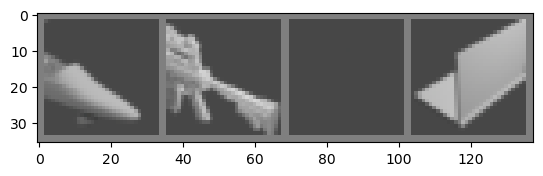

Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([ 2.7059,  2.5783, -2.4262,  0.2857,  1.1374, -5.8898, -5.6137, -5.5243,
        -5.7685, -5.7896])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.5611,  1.1654, -1.6446, -0.3974,  2.4606, -6.9257, -6.4489, -6.6513,
        -6.9775, -6.9370])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.7087,  0.5090,  2.9373,  1.7552, -0.0992, -5.1981, -5.1837, -5.2009,
        -5.2210, -5.0473])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.6303,  2.3308, -3.3501, -1.9634,  2.9650, -6.2659, -5.7905, -5.7980,
        -6.0928, -6.1170])


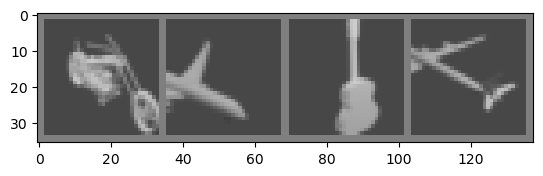

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  1.8260,   2.0027,   1.7600,   9.3553,  -1.9096, -12.8766, -12.1764,
        -12.1396, -12.2325, -12.1062])
Predict class - notebook, real class - bike, probability (airplane,bike) - tensor([ 0.0304,  2.2331,  0.0199,  4.3341, -0.3213, -6.3316, -6.3539, -6.1608,
        -6.0211, -6.2171])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([  6.1443,   3.8952,  -5.5105,  -3.2029,   5.0955, -10.8540, -10.0880,
        -10.0319, -10.6686, -10.7391])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 3.4831,  2.7906, -3.7377, -2.5051,  3.5650, -6.6368, -6.1487, -6.0933,
        -6.4614, -6.4240])


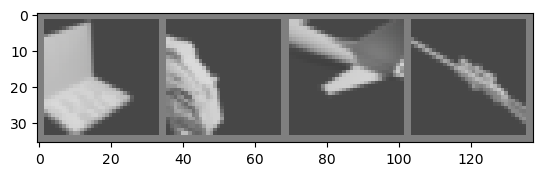

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0316,  0.6143,  2.3158, -0.0076,  1.3816, -4.5843, -4.7574, -4.8103,
        -4.6191, -4.6275])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 4.3325,  3.7594, -4.9935, -3.3655,  5.0079, -8.8593, -8.2535, -8.1123,
        -8.5838, -8.6290])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 3.6684,  3.1024, -4.2716, -3.3850,  5.3639, -8.2173, -7.7939, -7.6465,
        -8.0023, -8.0716])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  3.6774,   3.1110,   2.4176,  13.7987,  -3.1303, -18.4142, -17.2369,
        -17.3047, -17.2549, -17.2094])


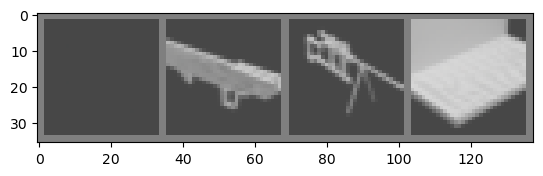

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.3332,  0.5596,  2.6604,  1.0251,  0.2219, -4.4101, -4.5186, -4.5194,
        -4.4538, -4.3620])
Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([ 2.9854,  2.0694, -2.7996, -0.3558,  1.8038, -5.6655, -5.2369, -5.2956,
        -5.4693, -5.6312])
Predict class - notebook, real class - bike, probability (airplane,bike) - tensor([ 1.0757,  2.6168,  0.2519,  4.4467,  0.0649, -8.1749, -7.8921, -7.8412,
        -7.7689, -7.7656])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  4.1055,   2.1536,   1.3332,  10.2341,  -3.0448, -14.2692, -13.1032,
        -13.3994, -13.4441, -13.3334])


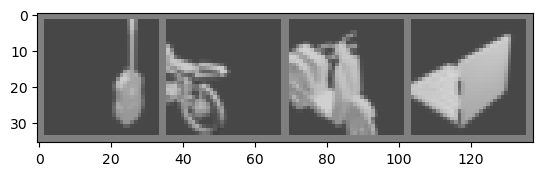

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.8480,  2.6653, -3.0254,  0.9106,  2.1716, -9.6899, -8.8819, -9.0740,
        -9.6098, -9.4820])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 6.1020,  1.9515, -2.6824,  2.4298,  0.2235, -9.3996, -8.5835, -8.8400,
        -9.4527, -9.4603])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 3.3455,  3.3630, -4.4227, -3.2805,  4.7373, -7.6906, -7.0600, -7.0531,
        -7.3252, -7.4004])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  3.8035,   1.8530,   2.2069,  10.2269,  -2.9538, -14.5204, -13.4022,
        -13.6160, -13.7678, -13.5447])


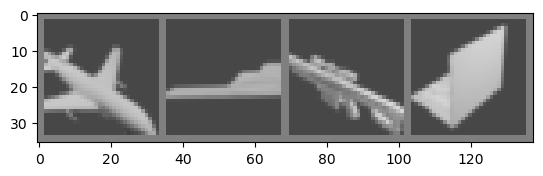

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.1088,  2.3728,  0.9552,  7.4038, -1.5933, -9.1437, -8.9617, -8.6424,
        -8.5062, -8.7265])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 3.2900,  3.1106, -4.0774, -3.3754,  4.6484, -7.2208, -6.6255, -6.5379,
        -6.9046, -6.8894])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.1412,  0.4032,  2.7427,  0.1985,  0.9083, -4.2610, -4.4099, -4.4443,
        -4.3272, -4.3025])
Predict class - weapon, real class - bike, probability (airplane,bike) - tensor([ 2.5100,  2.5736, -3.2560, -1.8986,  3.7755, -6.3031, -6.0944, -5.9515,
        -6.1589, -6.2252])


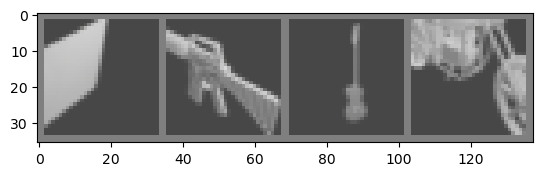

Predict class - airplane, real class - weapon, probability (airplane,bike) - tensor([ 3.0756,  1.2497, -1.9188, -1.1266,  2.6513, -5.9960, -5.6285, -5.7435,
        -6.0227, -6.0147])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 3.4716,  4.2643, -4.4833, -1.3990,  3.7936, -8.7100, -8.5342, -8.2887,
        -8.6098, -8.7191])
Predict class - notebook, real class - bike, probability (airplane,bike) - tensor([ 2.7309e-01,  2.8278e+00,  2.4761e-03,  3.8817e+00,  2.4292e-01,
        -6.9699e+00, -6.9106e+00, -6.7874e+00, -6.5816e+00, -6.7254e+00])
Predict class - weapon, real class - airplane, probability (airplane,bike) - tensor([  4.5781,   4.4355,  -6.1666,  -4.2599,   7.7279, -11.5578, -11.2026,
        -11.0403, -11.3474, -11.5575])


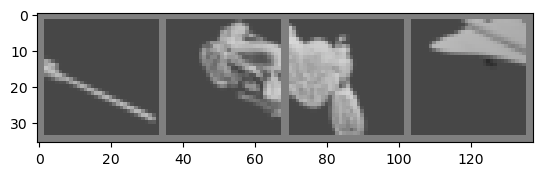

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.4695,  3.1662, -3.7146, -0.1229,  1.6442, -8.8236, -8.2304, -8.2785,
        -8.7699, -8.8343])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 2.2682e-03,  4.9089e-01,  2.1236e+00,  3.7371e-01,  7.6435e-01,
        -3.6201e+00, -3.8017e+00, -3.7984e+00, -3.6495e+00, -3.6371e+00])
Predict class - bike, real class - airplane, probability (airplane,bike) - tensor([ 3.4716,  4.8460, -3.6017, -0.0590,  3.2241, -9.9697, -9.7455, -9.4761,
        -9.7576, -9.8147])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.2935,  0.2138,  3.5913,  0.6363,  0.5493, -4.7848, -4.9385, -4.9419,
        -4.8795, -4.8086])


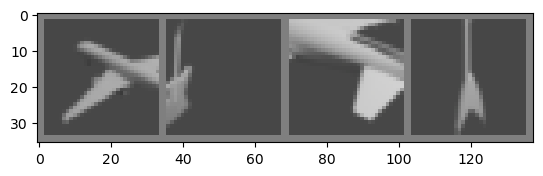

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0624,  0.5794,  2.2491,  0.0965,  1.1162, -4.1878, -4.3507, -4.3904,
        -4.2328, -4.2208])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.2199,  0.5747,  2.4759,  0.6644,  0.4711, -4.1107, -4.2480, -4.2602,
        -4.1628, -4.0964])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 1.3063,  0.1415,  3.6274,  2.3837, -0.2911, -6.4300, -6.3176, -6.3754,
        -6.5786, -6.3176])
Predict class - gitar, real class - notebook, probability (airplane,bike) - tensor([ 0.0316,  0.6143,  2.3154, -0.0076,  1.3814, -4.5835, -4.7566, -4.8095,
        -4.6183, -4.6267])


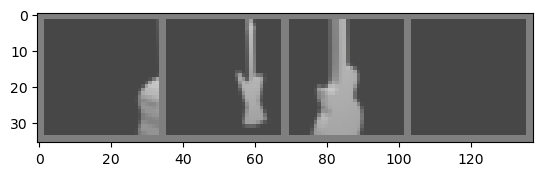

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 1.5476,  2.7193, -1.6205,  1.4258,  0.5595, -5.4594, -5.4378, -5.2803,
        -5.3690, -5.3423])
Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([ 2.7027,  0.5283,  1.2200,  0.5848,  1.1563, -6.4569, -6.1478, -6.3743,
        -6.5926, -6.4652])
Predict class - airplane, real class - weapon, probability (airplane,bike) - tensor([ 4.5363,  1.6412, -2.1256, -0.5434,  2.9228, -8.3942, -7.7723, -8.0794,
        -8.4791, -8.4044])
Predict class - notebook, real class - bike, probability (airplane,bike) - tensor([ 2.1927,  1.1966, -0.4968,  2.8098, -0.3403, -5.4993, -5.1267, -5.2963,
        -5.3445, -5.2916])


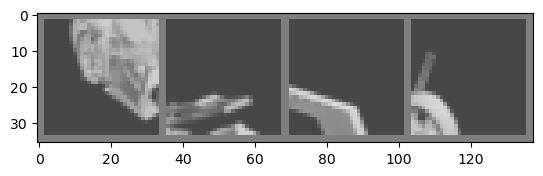

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 1.0944,  0.7029,  1.0122,  2.1889, -0.4049, -4.3216, -4.1773, -4.2856,
        -4.2221, -4.1619])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.1260,  0.4359,  2.4827,  0.0796,  1.0600, -4.2196, -4.3662, -4.4228,
        -4.2712, -4.2666])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0192,  0.5576,  2.1792,  0.0451,  1.2094, -4.2008, -4.3684, -4.4106,
        -4.2352, -4.2345])
Predict class - weapon, real class - bike, probability (airplane,bike) - tensor([ 3.2912,  3.5204, -4.2168, -1.9635,  3.5815, -7.4109, -6.8476, -6.8100,
        -7.0867, -7.1883])


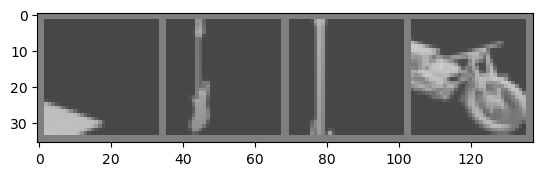

Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 4.0497,  1.5332, -0.1524,  6.3306, -2.2537, -9.5469, -8.6296, -9.0457,
        -9.1677, -9.1147])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.1135,  3.6997, -4.9165, -2.6717,  4.1490, -9.1857, -8.4924, -8.4342,
        -8.9708, -9.0246])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.2553,  0.5607,  2.4289,  0.9119,  0.3362, -4.0930, -4.1934, -4.1978,
        -4.1086, -4.0283])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 2.5872,  2.9047, -3.9027, -2.8843,  5.4630, -7.8237, -7.7340, -7.6191,
        -7.7259, -7.8914])


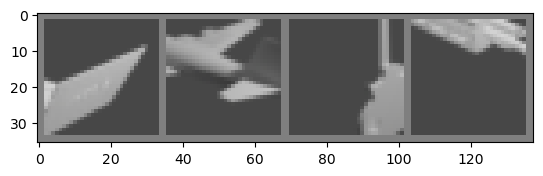

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([  5.0029,   4.7764,  -5.9846,  -4.2939,   6.7431, -11.2581, -10.6845,
        -10.4038, -10.9494, -11.0504])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  2.5021,   2.7954,   1.8996,  11.0059,  -2.1655, -14.5434, -13.7541,
        -13.7378, -13.5988, -13.6471])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0316,  0.6143,  2.3154, -0.0076,  1.3814, -4.5835, -4.7566, -4.8095,
        -4.6183, -4.6267])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.4158,  0.2750,  3.3377,  0.6050,  0.6364, -4.6961, -4.8441, -4.8703,
        -4.7899, -4.7497])


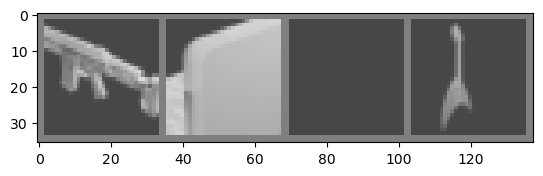

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 3.2436,  3.2724, -2.6912,  1.5477,  0.5989, -7.5384, -7.2453, -7.1313,
        -7.3731, -7.4036])
Predict class - gitar, real class - weapon, probability (airplane,bike) - tensor([ 0.0419,  0.5887,  2.2159,  0.0103,  1.2582, -4.3238, -4.4926, -4.5405,
        -4.3648, -4.3638])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 5.1881,  3.8193, -4.9161, -0.7866,  2.4390, -9.1284, -8.3763, -8.4133,
        -8.8699, -9.0152])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 1.7252,  2.1081, -1.6439,  1.9391,  0.5730, -5.5063, -5.2409, -5.2342,
        -5.2078, -5.4033])


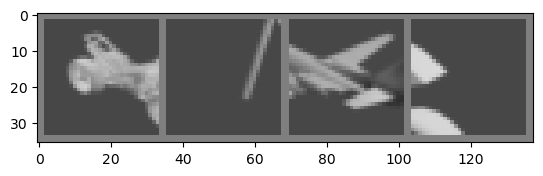

Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([ 4.7554,  3.1412, -4.6278, -2.4183,  3.8256, -8.2237, -7.5483, -7.6370,
        -7.9795, -8.0934])
Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 2.7602,  2.8896, -3.0505, -0.7506,  2.0268, -5.9815, -5.7658, -5.5799,
        -5.9000, -5.9563])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  2.9250,   1.9491,   0.8917,   6.9796,  -0.7217, -11.6679, -11.0444,
        -11.1435, -11.4585, -11.2273])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 2.6083,  4.0478, -4.0156, -2.7877,  4.7941, -8.0177, -7.8426, -7.4689,
        -7.8660, -7.8720])


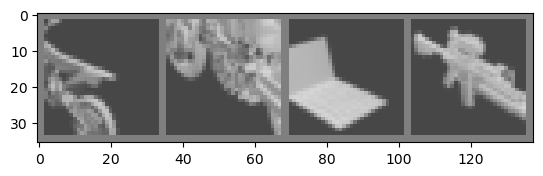

Predict class - gitar, real class - bike, probability (airplane,bike) - tensor([ 0.0317,  0.6143,  2.3158, -0.0077,  1.3816, -4.5842, -4.7572, -4.8101,
        -4.6190, -4.6274])
Predict class - bike, real class - airplane, probability (airplane,bike) - tensor([ 2.4817,  2.7453, -1.9564,  2.4140,  0.9173, -7.2776, -6.9863, -6.8802,
        -6.9355, -7.1382])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 4.3513,  3.6507, -3.4052,  2.2825,  1.0877, -9.4505, -8.9013, -8.8431,
        -9.0670, -9.3301])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.2931,  0.2112,  3.0975,  0.3568,  0.6724, -4.2733, -4.3911, -4.4280,
        -4.3564, -4.3013])


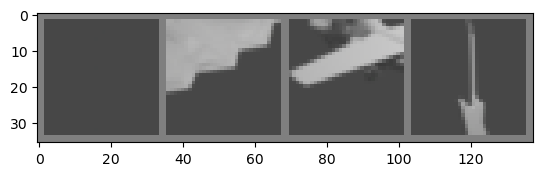

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.9232,  1.5879, -2.6635, -0.6700,  2.4078, -6.9224, -6.4113, -6.5510,
        -6.9365, -6.9197])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0316,  0.6143,  2.3154, -0.0076,  1.3814, -4.5835, -4.7566, -4.8095,
        -4.6183, -4.6267])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  2.4898,   2.5679,   2.4548,  10.6784,  -1.8029, -14.8751, -14.1381,
        -14.1471, -14.1023, -14.0200])
Predict class - airplane, real class - bike, probability (airplane,bike) - tensor([  6.0607,   5.9561,  -6.7534,  -2.8743,   5.0649, -12.3867, -11.5817,
        -11.4160, -12.0165, -12.2020])


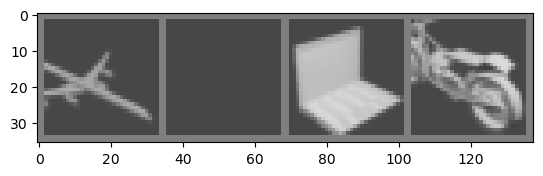

Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.0072,  1.2104, -1.4879, -0.7612,  2.4666, -6.0942, -5.7220, -5.8921,
        -6.1304, -6.1241])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([ 4.2096,  3.5883, -4.9832, -3.0857,  4.5515, -8.3707, -7.6321, -7.6128,
        -8.0336, -8.0450])
Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([  4.3697,   5.8427,  -7.0063,  -5.2890,   9.2587, -13.1683, -12.9207,
        -12.4825, -12.8571, -13.0911])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  2.0439,   1.7117,   2.3051,   8.4302,  -1.7149, -12.2109, -11.6055,
        -11.5832, -11.7181, -11.5218])


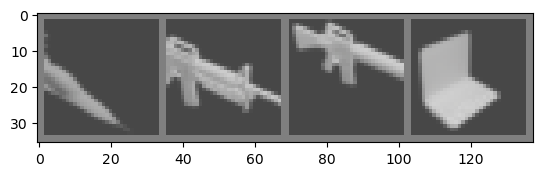

Predict class - weapon, real class - weapon, probability (airplane,bike) - tensor([  5.1483,   3.7318,  -5.6288,  -4.4405,   6.6513, -10.3422,  -9.5845,
         -9.4466,  -9.9861, -10.0800])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 3.9166,  2.2397, -1.1072,  4.2055, -1.3998, -8.4436, -7.8865, -8.0394,
        -8.2424, -8.2162])
Predict class - weapon, real class - notebook, probability (airplane,bike) - tensor([ 1.7563,  2.4919, -3.0227, -1.7178,  3.7670, -5.9112, -5.9236, -5.8092,
        -5.8523, -5.9444])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.6591,  0.3336,  2.7654,  1.4874,  0.0806, -4.7588, -4.7870, -4.8026,
        -4.8091, -4.7202])


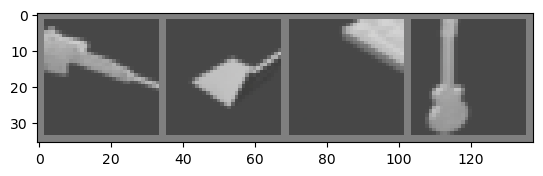

Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0316,  0.6143,  2.3154, -0.0076,  1.3814, -4.5835, -4.7566, -4.8095,
        -4.6183, -4.6267])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 1.7334,  1.5270,  1.9639,  6.7110, -1.5969, -9.5831, -9.1188, -9.1473,
        -9.1414, -8.9074])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([  1.9042,   2.2329,   2.3455,   8.1863,  -1.5227, -11.7481, -11.3050,
        -11.2532, -11.1969, -10.9896])
Predict class - notebook, real class - notebook, probability (airplane,bike) - tensor([ 0.1070,  1.0230,  0.1900,  2.1708, -0.3069, -3.1085, -3.1717, -3.0533,
        -2.9664, -3.0029])


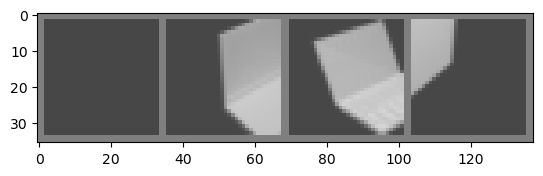

Predict class - bike, real class - bike, probability (airplane,bike) - tensor([ 2.4367,  4.0406, -3.6695, -1.6980,  3.8185, -7.7552, -7.6610, -7.3205,
        -7.6538, -7.6812])
Predict class - notebook, real class - airplane, probability (airplane,bike) - tensor([  3.2435,   3.3145,  -1.1826,   5.1123,  -0.3154, -10.2816,  -9.7156,
         -9.7254,  -9.8811,  -9.8848])
Predict class - airplane, real class - airplane, probability (airplane,bike) - tensor([ 3.2518,  1.6679, -2.3261,  0.8105,  1.0756, -5.9941, -5.5509, -5.6449,
        -5.8380, -5.9613])
Predict class - gitar, real class - gitar, probability (airplane,bike) - tensor([ 0.0950,  0.5282,  2.2587,  0.1492,  0.9396, -3.9422, -4.0877, -4.1240,
        -3.9898, -3.9702])


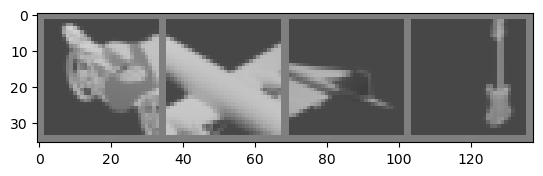

Accuracy of the network on the 100 test images: 77 %


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        for printdata in list(zip(predicted,labels,outputs)):
            printclass =[classes[int(printdata[0])],classes[int(printdata[1])]]
            print('Predict class - {0}, real class - {1}, probability ({2},{3}) - {4}'.format( printclass[0],printclass[1],
                                                                              classes[0], classes [1],printdata[2]))

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        imshow(torchvision.utils.make_grid(images))
        #print('GroundTruth: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
print('Accuracy of the network on the', dataset_sizes['test'], 'test images: %d %%' % (
    100 * correct / total))

In [10]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 70.0 %
Accuracy for class: bike  is 45.0 %
Accuracy for class: gitar is 95.0 %
Accuracy for class: notebook is 75.0 %
Accuracy for class: weapon is 75.0 %
